<center> <h4> Московский авиационный институт </h4> </center>
<center> <h4> (национальный исследовательский университет) </h4> </center>
<center> <h4> Институт №8 «Информационные технологии и прикладная математика» </h4> </center>
<center> <h4> Кафедра 806 «Вычислительная математика и программирование» </h4> </center>
<br><br><br><br><br>
<center> <h3> Курсовой проект по курсу «Численные методы» </h3> </center>
<center> <h4> на тему </h4> </center>
<center> <h3> «Численное решение жестких систем ОДУ с использованием неявных методов Рунге-Кутты» </h3> </center>
<br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br>
<div align="right"><font size="3"><strong>Работу выполнил:</strong></font> </div>
<div align="right">ФИО: Глушатов Игорь Сергеевич</div>
<div align="right">Группа: М8О-307Б-19</div>
<div align="right">Преподаватель: Ревизников Д. Л.</div>


## Цель

&nbsp;&nbsp;&nbsp;&nbsp; Необходимо реализовать диагонально-неявный тип метода Рунге-Кутты для решения жёстких систем обыкновенных дифференциальных уравнений (ОДУ), провести анализ двух/трёх/четырёх-этапных методов, сравнить их с неявным методом Эйлера (как частного случая неявного метода Рунге-Кутты) и явными методами Эйлера и Рунге-Кутты.

#### Задача:

Пусть $y, f, K_i \in R^n, x, h \in R$

Тогда следует решить уравнение (систему уравнений):

$y' = f(x, y), y(x_0)=y_0$

В случае наличия производных порядков больше первого, производится замена переменных, сводящая задачу к виду выше.

## 1. Явные методы Рунге-Кутта

Метод Рунге-Кутта - класс численных методов решения систем ОДУ.

Табличное решение в общем виде будет выглядеть следующим образом:

$ K_i = f(x_n + c_i h, y_n + h\sum\limits_{j = 1}^{i - 1} a_{ij}K_j), i = \overline{1...s} $

$ y_{n + 1} = y_n + h\sum\limits_{i = 1}^{s} b_iK_i $

$h$ - размер сетки.

Число $s$ и коэффициенты $c_i, b_i, a_{ij}$ определяются и расчитываются отдельно и определяют конкретный метод семейства. Для простоты восприятия данных коэффициентов существует таблица Бутчера, общий вид которой:

$$
\begin{array}{c|cccc}
c_1    & a_{11} & a_{12} & \cdots & a_{1s} \\ 
c_2    & a_{21} & a_{22} & \cdots & a_{2s} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
c_s    & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
       & b_1 & b_2 & \cdots & b_s
\end{array}
$$

Или же:

$$
\begin{array}{c|c}
c & A \\ \hline
  & b^T
\end{array}
$$

Для явных методов Рунге-Кутты матрица $A$ является строго нижнетреугольной:

$$
\begin{array}{c|cccc}
c_1    & 0 & 0 & \cdots & 0 \\ 
c_2    & a_{21} & 0 & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
c_s    & a_{s1} & a_{s2} & \cdots & 0 \\ \hline
       & b_1 & b_2 & \cdots & b_s
\end{array}
$$

Пример матрицы Бутчера для метода Ральстона второго порядка с двумя этапами:

$$
\begin{array}{c|cc}
0    & 0 & 0  \\  
\frac{2}{3}  & \frac{2}{3} & 0  \\ \hline
       & \frac{1}{4} & \frac{3}{4}
\end{array}
$$

Частным случаем явного метода Рунге-Кутта является метод Эйлера первого порядка с одним этапом. Его матрица Бутчера выглядит следующим образом:

$$
\begin{array}{c|c}
0 & 0 \\ \hline
       & 1
\end{array}
$$

и эквивалентна такой записи:

$ K_1 = f(x_n + 0 \cdot h, y_n + h (0 \cdot K_1)) = f(x_n, y_n)$

$ y_{n+1} = y_n + h(1 \cdot K_1) = y_n + hf(x_n, y_n) $

Преймуществом явных методов Рунге-Кутты заключается в вычислительной последовательности коэффициентов $K_i$. Несмотря на то, что семейство явных методов отлично справляется с большим множестовом ОДУ, с ними возникает проблема при решении жестких систем, так как явные методы не обладают достаточной устойчивостью.

Реализация явного метода Рунге-Кутта:

In [1]:
class RungeKuttaMethodP:
    
    def __init__(self, X0, Y0, F, Acb):
        self.X0 = X0
        self.Y0 = Y0
        self.F = F
        
        self.Acb = Acb
        self.A, self.c, self.b = self.Acb()
        self.s = len(self.A)
        
        self.Table = [(self.X0, self.Y0)]
        
    def Solve(self, b, h = 0.1):
        
        for x_k in np.arange(self.X0, b, h):
            u_k = self.Table[-1][1].copy()
            
            K = [0.0 for _ in range(len(self.b))]
            
            for i in range(len(K)):
                K[i] = self.F(x_k + self.c[i] * h, *(u_k + sum(h * self.A[i][j] * K[j] for j in range(len(K)))))
            
            u_kp1 = u_k + sum(h * self.b[i] * K[i] for i in range(self.s))
                
            self.Table.append((x_k + h, u_kp1.copy()))
        
        return self
    
    def table(self, i = 0):
        return np.array([(x, Y[i]) for x, Y in self.Table])

## 2. Неявные методы Рунге-Кутта

Простейшим типом семейства неявных методов Рунге-Кутты являются диагонально-неявные методы. Постановка задачи остается такой же, а общее решение записывает так:

$ K_i = f(x_n + c_i h, y_n + h\sum\limits_{j = 1}^{i - 1} a_{ij}K_j + ha_{ii}K_{i}), i = \overline{1...s} $

$ y_{n + 1} = y_n + h\sum\limits_{i = 1}^{s} b_iK_i $

$h$ - размер сетки.

Матрицы Бутчера для диагонально-неявных методов имеют такой вид:

$$
\begin{array}{c|cccc}
c_1    & a_{11} & 0 & \cdots & 0 \\ 
c_2    & a_{21} & a_{22} & \cdots & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
c_s    & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
       & b_1 & b_2 & \cdots & b_s
\end{array}
$$

Тут матрица $A$ остается нижнетреугольной, но на главной диагонали не все коэффициенты являются нулевыми. Естественной проблемой является аналитическая неразрешимость в общем случае уравнений относительно коэффициентов $K_i$, поэтому для их нахождения применяются численные методы простых итераций и/или метод Ньютона и другие.

Частным случаем неяного метода Рунге-Кутта является неявный метод Эйлера первого порядка с одним этапом. Его матрица бутчера выглядит так:

$$
\begin{array}{c|c}
1 & 1 \\ \hline
       & 1
\end{array}
$$

и эквивалентна такой записи:

$ K_1 = f(x_n + h, y_n + hK_1) = f(x_n + h, y_n + hK_1)$

$ y_{n+1} = y_n + h(1 \cdot K_1) = y_n + hf(x_{n+1}, y_n + hK_1) \Rightarrow \frac{y_{n+1} - y_n}{h} = f(x_{n+1}, y_n + hK_1) = K_1 \Rightarrow $

$ \Rightarrow y_{n+1} = y_n + hf(x_{n+1}, y_{n+1}) $

Реализация диагонально-неявного метода Рунге-Кутта:

In [2]:
class DiagonallyImplicitRungeKuttaMethodP:
    
    def __init__(self, X0, Y0, F, dF, Acb):
        self.X0 = X0
        self.Y0 = Y0
        self.F = F
        self.dF = dF
        
        self.Acb = Acb
        self.A, self.c, self.b = self.Acb()
        self.s = len(self.A)
        
        self.Table = [(self.X0, self.Y0)]
        
    def Solve(self, b, h = 0.1):
        
        for x_k in np.arange(self.X0, b, h):
            u_k = self.Table[-1][1].copy()
            
            K = [np.zeros_like(self.Y0) for _ in range(len(self.b))]

            for i in range(len(K)):

                temp = u_k + sum(h * self.A[i][j] * K[j] for j in range(i))
                
                N = 0
                while True:
                    f_Ki = K[i] - self.F(x_k + self.c[i] * h, *(temp + h * self.A[i][i] * K[i]))
            
                    if len(self.Y0) > 1:
                        df_Ki = np.eye(len(self.Y0)) - self.dF(x_k + self.c[i] * h, *(temp + h * self.A[i][i] * K[i])) * (h * self.A[i][i])
                        dKi = np.linalg.solve(df_Ki, -f_Ki)
                    else:
                        df_Ki = np.array([1.0]) - self.dF(x_k + self.c[i] * h, *(temp + h * self.A[i][i] * K[i])) * (h * self.A[i][i])
                        dKi = -f_Ki/df_Ki
                        
                    K[i] = K[i] + dKi
                    
                    if np.max(np.abs(f_Ki)) <= 0.001 or N > 50:
                        break
                        
                    N +=1
            
            u_kp1 = u_k + sum(h * self.b[i] * K[i] for i in range(self.s))
                
            self.Table.append((x_k + h, u_kp1.copy()))
            
        return self
    
    def table(self, i = 0):
        return np.array([(x, Y[i]) for x, Y in self.Table])

Ниже приведены некоторые примеры матриц Бутчера для явного и диагонально-неявного методов Рунге-Кутты

In [3]:
import math, numpy as np, pandas as pd, warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

def Euler1step1order():
    A = np.array([
        [0.0],
    ])
    c = np.array([0.0])
    b = np.array([1.0])
    return A, c, b

def BackwardEuler1step1order():
    A = np.array([
        [1.0],
    ])
    c = np.array([1.0])
    b = np.array([1.0])
    return A, c, b

def Ralston3step3order():
    A = np.array([
        [0.0, 0.0, 0.0],
        [1/2, 0.0, 0.0],
        [0.0, 3/4, 0.0],
    ])
    c = np.array([x, 1/2, 3/4])
    b = np.array([2/9, 1/3, 4/9])
    return A, c, b

def RK4step4order(): 
    A = np.array([
        [0.0, 0.0, 0.0, 0.0],
        [0.5, 0.0, 0.0, 0.0],
        [0.0, 0.5, 0.0, 0.0],
        [0.0, 0.0, 1.0, 0.0]
    ])
    c = np.array([0.0, 0.5, 0.5, 1.0])
    b = np.array([1/6, 2/6, 2/6, 1/6])
    return A, c, b

def PR2step2order(x = 1+(1/(2**.5))):
    A = np.array([
        [x, 0.0],
        [1-2*x, x],
    ])
    c = np.array([x, 1-x])
    b = np.array([0.5, 0.5])
    return A, c, b

def Trap2step2order():
    A = np.array([
        [0.0, 0.0],
        [0.5, 0.5],
    ])
    c = np.array([0, 1])
    b = np.array([0.5, 0.5])
    return A, c, b

def Acb3step4order(x = 1.06858):
    A = np.array([
        [x, 0.0, 0.0],
        [1/2 - x, x, 0.0],
        [2*x, 1-4*x, x],
    ])
    c = np.array([x, 1/2, 1-x])
    b = np.array([1/(6*(1-2*x)**2), (3*(1-2*x)**2 - 1)/(3*(1-2*x)**2), 1/(6*(1-2*x)**2)])
    return A, c, b

def Acb4step3order():
    A = np.array([
        [1/2, 0.0, 0.0, 0.0],
        [1/6, 1/2, 0.0, 0.0],
        [-1/2, 1/2, 1/2, 0.0],
        [3/2, -3/2, 1/2, 1/2],
    ])
    c = np.array([1/2, 2/3, 1/2, 1.0])
    b = np.array([3/2, -3/2, 1/2, 1/2])
    return A, c, b

## 3. А- и L-устойчивость

Важным критерием алгоритмов численного решения систем ОДУ является их устойчивость. Грубо говоря, устойчивость подразумевает, что метод при решении жесткой системы не "улетит", т.е. не начнет с определенного момента выдавать значения намного больше предыдущих, если решение системы это не подразумевает.

Для проверки устойчивости неявных методов принято рассматривать такую задачу:

$ y' = \lambda y, y(x_0) = y_0, \lambda < 0 $

К слову, решением данного уравнения является выражение: 

$$ \frac{dy}{dx} = \lambda y \Rightarrow \frac{dy}{y} = \lambda dx \Rightarrow \int \frac{dy}{y} = \int \lambda dx \Rightarrow ln|y| = \lambda x + C_1 \Rightarrow y(x) = e^{\lambda x + C_1} $$

$ y(x) = y_0 e^{\lambda (x - x_0)} $

Применительно к данному уравнению метод Рунге-Кутта сводится к итерации: $ y_{n+1} = R(h \lambda )y_n $

К примеру, неявный метод Эйлера:

$ y_{n+1} = y_n + hf(x_{n+1}, y_{n+1}) = y_n + h \lambda y_{n+1} \Rightarrow y_{n+1} = \frac{1}{1-h \lambda}y_n$

или явный метод Эйлера:

$ y_{n+1} = y_n + hf(x_{n}, y_{n}) = y_n + h \lambda y_{n} \Rightarrow y_{n+1} = (1+h \lambda)y_n$

Функция $R(z)$ называется **функцией устойчивостью** и представляется для методов Рунге-Кутта в общем виде так:

$$ R(z) = 1 + zb^T(I-zA)^{-1}e = \frac{det(I-zA+zeb^T)}{det(I-zA)} $$

Так как решение данной задачи ($ y_0 e^{\lambda (x - x_0)} \rightarrow 0$) убывает до нуля при $x \rightarrow \infty$, то для устойчивости метода мы должны гарантировать, что $|R(z)| < 1$.

1. Метод называется абсолютно устойчивым или **А - устойчивым**, если:

$$\forall z \in C: Re(z) < 0 \Rightarrow |R(z)| < 1$$

Частным случаем А - устойчивости является **L - устойчивость**.

2. Метод называется **L - устойчивым**, если он А - устойчив и:

$$z \rightarrow \infty \Rightarrow R(z) \rightarrow 0$$

Устойчивость методов удобно рассматривать на графике $R(z)$ от $z$.

In [4]:
def Rplot(Acb, xx = (-6, 6), yy = (-6, 6), dbg = False, s = None):
    A,_,b = Acb() if s is None else Acb(s)
    A = matrix(A)
    b = vector(b)
    
    z = var("z", domain='complex')
    det1 = (matrix(np.eye(len(b))) - z * A).det()
    det2 = (matrix(np.eye(len(b))) - z * A + z*vector(np.ones(len(b))).column() * b.row()).det()
    
    R(z) = det2 / det1
    
    if dbg: show("R(z) = ", R(z).full_simplify())
    
    def f(x,y): 
        z = x+i*y 
        return abs(R(z)) <= 1

    return region_plot( f , xrange=xx, yrange=yy )

Рассмотрим график $R(z)$ для явного метода Эйлера:

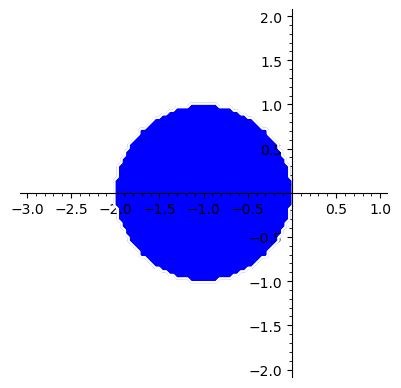

In [5]:
Rplot(Euler1step1order, (-3, 1), (-2, 2))

Видим, что зона устойчивости этого метода - круг единичного радиуса с центром в точке $(-1, 0)$. Данный метод не является А-устойчивым, поэтому он плохо работает для жестких систем.

$$|R(z)| = |(1 +h \lambda)| < 1 \Rightarrow$$

$$ -1 < (1 +h \lambda) < 1 \Rightarrow $$

$$ -2 < h \lambda < 0$$

Для $\lambda < 0$ условие $h \lambda < 0$ всегда выполняется. А для условия $-2 < h \lambda \Rightarrow$

$$ h < \frac{-2}{\lambda} $$

Это значит, что для решения тестовой системы с $\lambda = -100$ нужно взять $h < 0.02$. Но что делать, если мы хотим взять шаг с десятыми долями? 

Рассмотрим теперь график для неявного метода Эйлера:

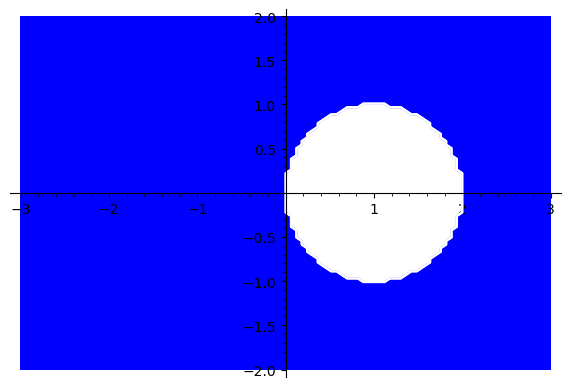

In [6]:
Rplot(BackwardEuler1step1order, (-3, 3), (-2, 2))

Тут мы видим, что зона НЕустойчивости - круг единичного радиуса с центром в точке $(1, 0)$. За этим кругом вся зона - зона устойчивости метода. Причем видим, что данный метод по определению является А - устойчивым и даже L - устойчивым.

$$|R(z)| = \left|\frac{1}{1-h \lambda}\right| < 1 \Rightarrow $$

$$ |1-h \lambda| > 1 \Rightarrow $$

$$
\begin{align}
\left[
\begin{array}{ll}
    1-h \lambda > 1 \\
    1-h \lambda <-1
\end{array}
\right. \Rightarrow 
\left[
\begin{array}{ll}
    h \lambda < 0 \\
    h \lambda > 2
\end{array}
\right. \Rightarrow h \lambda < 0 \Rightarrow h - любое
\end{align} 
$$

При использовании неявного метода Эйлера мы видим, что он будет устойчивым при любом h, какой бы его не выбрали. 

В этом и заключается преймущество неявных методов решения ОДУ. Для А-устойчивых методов мы можем выбирать какой-угодно шаг. Однако не гарантируется, что решение не будет "прыгать", но гарантируется, что оно не "улетит".

Рассмотрим еще один известный неявный метод трапеций:

'R(z) = ' (-0.5*z - 1.0)/(0.5*z - 1.0)

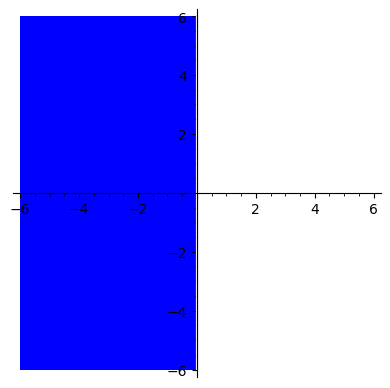

In [7]:
Rplot(Trap2step2order, dbg = True)

По графику видим, что метод является А - устойчивым, но не является L - устойчивым.

$$|R(z)| = \left|\frac{-\frac{1}{2} h \lambda - 1}{\frac{1}{2} h \lambda - 1}\right| 
= \left|\frac{h \lambda + 2}{ h \lambda - 2}\right| < 1 \Rightarrow $$

$$ \left|1 + \frac{4}{ h \lambda - 2}\right| < 1 \Rightarrow
-1 < 1 + \frac{4}{ h \lambda - 2} < 1 \Rightarrow
$$

$$
-\frac{1}{2} < \frac{1}{ h \lambda - 2} < 0
$$

Так как $h \lambda < 0 \Rightarrow h \lambda - 2 < -2$. В таком случае условие всегда выполняется и метод является А - устойчивым.

Также можно продемонстрировать то, как расширяется зона устойчивости явных методов при увеличении порядка метода:

'R(z) = ' 0.04166666666666668*z^4 + 0.1666666666666667*z^3 + 0.5000000000000001*z^2 + 1.0*z + 1.0

'R(z) = ' 0.1666666666666667*z^3 + 0.5*z^2 + 0.9999999999999999*z + 1.0

'R(z) = ' 0.5*z^2 + 1.0*z + 1.0

'R(z) = ' 1.0*z + 1.0

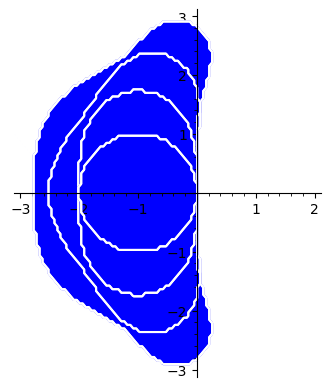

In [8]:
Rplot(RK4step4order, (-3, 2), (-3, 3), dbg = True) +\
Rplot(Ralston3step3order, (-3, 2), (-3, 3), dbg = True) +\
Rplot(PR2step2order, (-3, 2), (-3, 3), dbg = True, s=0) +\
Rplot(Euler1step1order, (-3, 2), (-3, 3), dbg = True)

## 4. Решение жестких задач и анализ

In [9]:
def EPS(Tables, fun, labels = None):
    Data = []
    Columns = [['', ''], ['$$x$$', '$$y_{ист}$$']]
    x = Tables[0][:, :1].T[0]
    y = []
    
    Data.append(x); Data.append(fun(x))
    
    for table in Tables:
        y.append(table[:, 1:2].T[0])

    if labels is None:
        for i in range(len(y)):
            Data.append(y[i]); Data.append(np.abs(y[i] - fun(x)))
            Columns[0].append(f'Method {i}'); Columns[0].append(f'Method {i}')
            Columns[1].append(f'$y_{i}$'); Columns[1].append(f'$\epsilon_{i}$')
    else:
        for i in range(len(y)):
            Data.append(y[i]); Data.append(np.abs(y[i] - fun(x)))
            Columns[0].append(labels[i]); Columns[0].append(labels[i])
            Columns[1].append(f'$y_{i}$'); Columns[1].append(f'$\epsilon_{i}$')
            
    return pd.DataFrame(data=np.array(Data).T, columns=Columns)

### 1. $y' = \lambda y$

Для начала возьмём тестовую задачу, которую мы рассматривали для анализа устойчивости методов.

Пусть $\lambda = -100, y(0) = 1$. Тогда:

$$y' = -100y \Rightarrow $$

$$y(x) = e^{-100x}$$

In [10]:
l = -100
H = 0.1
a = 0.0
b = 3.0
Y0 = np.array([1.0])

def F(x, y):
    return np.array([
        l*y,
    ])

def dF(x, y):
    return np.array([
        l
    ])

def y(x):
    return Y0 * np.exp(l * (x - a))

Рассмотрим решение задачи на методах Эйлера и трапеций

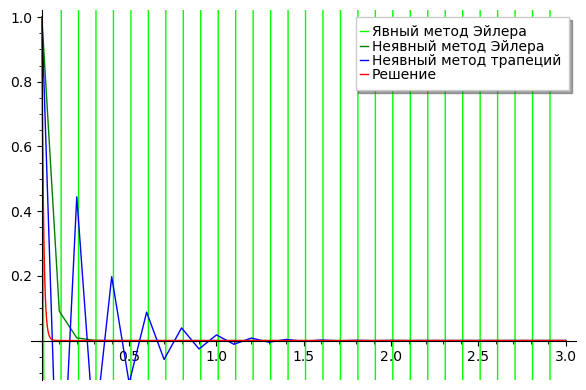

Явный метод Эйлера               Неявный метод Эйлера  \
   $$x$$   $$y_{ист}$$              $y_0$  $\epsilon_0$                $y_1$   
0    0.0  1.000000e+00       1.000000e+00  0.000000e+00         1.000000e+00   
1    0.1  4.539993e-05      -9.000000e+00  9.000045e+00         9.090909e-02   
2    0.2  2.061154e-09       8.100000e+01  8.100000e+01         8.264463e-03   
3    0.3  9.357623e-14      -7.290000e+02  7.290000e+02         7.513148e-04   
4    0.4  4.248354e-18       6.561000e+03  6.561000e+03         6.830135e-05   
5    0.5  1.928750e-22      -5.904900e+04  5.904900e+04         6.209213e-06   
6    0.6  8.756511e-27       5.314410e+05  5.314410e+05         5.644739e-07   
7    0.7  3.975450e-31      -4.782969e+06  4.782969e+06         5.131581e-08   
8    0.8  1.804851e-35       4.304672e+07  4.304672e+07         4.665074e-09   
9    0.9  8.194013e-40      -3.874205e+08  3.874205e+08         4.240976e-10   
10   1.0  3.720076e-44       3.486784e+09  3.486784e+09         3.855433e-11   
11   1.1  1.688912e-48      -3.138106e+10  3.138106e+10         3.504939e-12   
12   1.2  7.667648e-53       2.824295e+11  2.824295e+11         3.186308e-13   

                 Неявный метод трапеций               
    $\epsilon_1$                  $y_2$ $\epsilon_2$  
0   0.000000e+00               1.000000     0.000000  
1   9.086369e-02              -0.666667     0.666712  
2   8.264461e-03               0.444444     0.444444  
3   7.513148e-04              -0.296296     0.296296  
4   6.830135e-05               0.197531     0.197531  
5   6.209213e-06              -0.131687     0.131687  
6   5.644739e-07               0.087791     0.087791  
7   5.131581e-08              -0.058528     0.058528  
8   4.665074e-09               0.039018     0.039018  
9   4.240976e-10              -0.026012     0.026012  
10  3.855433e-11               0.017342     0.017342  
11  3.504939e-12              -0.011561     0.011561  
12  3.186308e-13               0.007707     0.007707

In [11]:
EM = RungeKuttaMethodP(a, Y0, F, Euler1step1order)
IEM = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, BackwardEuler1step1order)
TM = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Trap2step2order)

Table1 = EM.Solve(b, H).table(0)
Table2 = IEM.Solve(b, H).table(0)
Table3 = TM.Solve(b, H).table(0)

(list_plot(Table1, color = 'lime', plotjoined=True, legend_label ='Явный метод Эйлера') +\
 list_plot(Table2, color = 'green', plotjoined=True, legend_label ='Неявный метод Эйлера') +\
 list_plot(Table3, color = 'blue', plotjoined=True, legend_label ='Неявный метод трапеций') +\
plot(y, (a, b), color = 'red', legend_label ='Решение')).show(ymax = 1, ymin = -0.1)

EPS([Table1, Table2, Table3], y, labels=['Явный метод Эйлера', 'Неявный метод Эйлера', 'Неявный метод трапеций']).head(int(13))

#### Выводы:
1. Явный метод Эйлера в силу своей неустойчивости "улетел", и максимальная погрешность находится в районе $10^{11}$
2. Неявный метод Эйлера очень хорошо решил систему. Нет никаких шумов, а максимальная погрешность не больше $10^{-2}$
3. Метод трапеций проявил себя не очень хорошо. Погрешность в десятых долях, и к тому же решение системы очень шумит.

Теперь посмотрим результаты методов большего порядка (не считая метода Перески и Руссо)

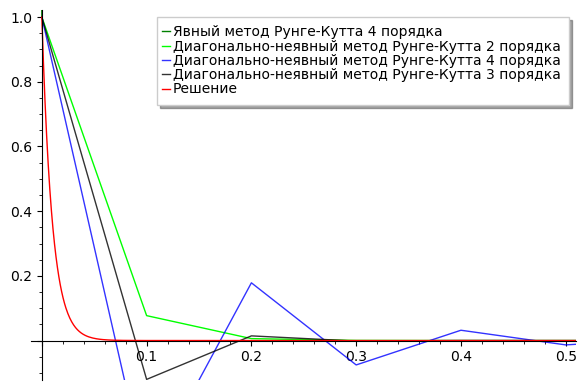

Явный метод Рунге-Кутта 4 порядка                \
   $$x$$   $$y_{ист}$$                             $y_0$  $\epsilon_0$   
0    0.0  1.000000e+00                      1.000000e+00  0.000000e+00   
1    0.1  4.539993e-05                      2.910000e+02  2.910000e+02   
2    0.2  2.061154e-09                      8.468100e+04  8.468100e+04   
3    0.3  9.357623e-14                      2.464217e+07  2.464217e+07   
4    0.4  4.248354e-18                      7.170872e+09  7.170872e+09   
5    0.5  1.928750e-22                      2.086724e+12  2.086724e+12   
6    0.6  8.756511e-27                      6.072366e+14  6.072366e+14   
7    0.7  3.975450e-31                      1.767058e+17  1.767058e+17   
8    0.8  1.804851e-35                      5.142140e+19  5.142140e+19   
9    0.9  8.194013e-40                      1.496363e+22  1.496363e+22   
10   1.0  3.720076e-44                      4.354416e+24  4.354416e+24   
11   1.1  1.688912e-48                      1.267135e+27  1.267135e+27   
12   1.2  7.667648e-53                      3.687363e+29  3.687363e+29   

   Диагонально-неявный метод Рунге-Кутта 2 порядка                \
                                             $y_1$  $\epsilon_1$   
0                                     1.000000e+00  0.000000e+00   
1                                     7.699004e-02  7.694464e-02   
2                                     5.927466e-03  5.927464e-03   
3                                     4.563558e-04  4.563558e-04   
4                                     3.513485e-05  3.513485e-05   
5                                     2.705034e-06  2.705034e-06   
6                                     2.082606e-07  2.082606e-07   
7                                     1.603399e-08  1.603399e-08   
8                                     1.234458e-09  1.234458e-09   
9                                     9.504096e-11  9.504096e-11   
10                                    7.317207e-12  7.317207e-12   
11                                    5.633520e-13  5.633520e-13   
12                                    4.337249e-14  4.337249e-14   

   Диагонально-неявный метод Рунге-Кутта 4 порядка               \
                                             $y_2$ $\epsilon_2$   
0                                         1.000000     0.000000   
1                                        -0.422469     0.422514   
2                                         0.178480     0.178480   
3                                        -0.075402     0.075402   
4                                         0.031855     0.031855   
5                                        -0.013458     0.013458   
6                                         0.005685     0.005685   
7                                        -0.002402     0.002402   
8                                         0.001015     0.001015   
9                                        -0.000429     0.000429   
10                                        0.000181     0.000181   
11                                       -0.000077     0.000077   
12                                        0.000032     0.000032   

   Диагонально-неявный метод Рунге-Кутта 3 порядка                
                                             $y_3$  $\epsilon_3$  
0                                     1.000000e+00  0.000000e+00  
1                                    -1.201132e-01  1.201586e-01  
2                                     1.442717e-02  1.442717e-02  
3                                    -1.732894e-03  1.732894e-03  
4                                     2.081433e-04  2.081433e-04  
5                                    -2.500075e-05  2.500075e-05  
6                                     3.002920e-06  3.002920e-06  
7                                    -3.606902e-07  3.606902e-07  
8                                     4.332365e-08  4.332365e-08  
9                                    -5.203740e-09  5.203740e-09  
10                                    6.250377e-10  6.250377e-10  
11            

In [12]:
RGM4 = RungeKuttaMethodP(a, Y0, F, RK4step4order)
IRGM2 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, PR2step2order)
IRGM3 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Acb3step4order)
IRGM4 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Acb4step3order)

Table1 = RGM4.Solve(b, H).table(0)
Table2 = IRGM2.Solve(b, H).table(0)
Table3 = IRGM3.Solve(b, H).table(0)
Table4 = IRGM4.Solve(b, H).table(0)

(list_plot(Table1, color = 'green', plotjoined=True, legend_label ='Явный метод Рунге-Кутта 4 порядка') +\
 list_plot(Table2, color = 'lime', plotjoined=True, legend_label ='Диагонально-неявный метод Рунге-Кутта 2 порядка') +\
 list_plot(Table3, color = 'blue', plotjoined=True, alpha =0.8, legend_label ='Диагонально-неявный метод Рунге-Кутта 4 порядка') +\
 list_plot(Table4, color = 'black', plotjoined=True, alpha =0.8, legend_label ='Диагонально-неявный метод Рунге-Кутта 3 порядка') +\
plot(y, (a, b), color = 'red', legend_label ='Решение')).show(ymax = 1, ymin = -0.1, xmax =0.5)

EPS([Table1, Table2, Table3, Table4], y, 
    labels=['Явный метод Рунге-Кутта 4 порядка', 'Диагонально-неявный метод Рунге-Кутта 2 порядка', 
            'Диагонально-неявный метод Рунге-Кутта 4 порядка', 'Диагонально-неявный метод Рунге-Кутта 3 порядка']).head(int(13))

#### Выводы:

Явный метод Рунге-Кутты "улетел", совсем неправильно решив систему. Диагонально-неявные методы показали себя очень хорошо. В особенности метод Перески-Руссо второго порядка. В целом погрешность неявных методов максимум в десятых долях. Учитывая размер шага, то результат очень неплохой.

### 2. $y' = \lambda (y - cos(x))$

Следующая рассматриваемая задача похожа на предыдущую. Её общее решение:

$$ y(x) = C_1e^{\lambda x} - \frac{\lambda}{\lambda^2 + 1}(sin(x) - \lambda cos(x)) $$

Пусть $\lambda = -100, y(0) = 0$. Тогда:

$$ y' = -100(y - cos(x)) \Rightarrow $$

$$y(x) = -\frac{10000}{10001} e^{-100 x} + \frac{100}{10001}(sin(x) + 100 cos(x)) $$

In [13]:
l = -100
H = 0.1
a = 0.0
b = 3.0
Y0 = np.array([0.0])

def F(x, y):
    return np.array([
        l*(y - np.cos(x)),
    ])

def dF(x, y):
    return np.array([
        l
    ])

def y(x):
    C1 = - l**2 / (1 + l**2)
    return C1 * np.exp(l * x) - (l / (1 + l**2)) * (np.sin(x) - l * np.cos(x))

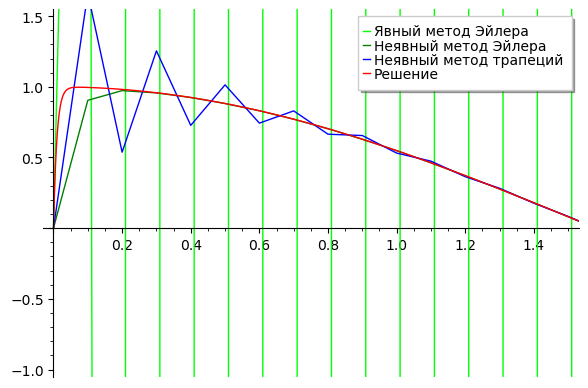

Явный метод Эйлера               Неявный метод Эйлера  \
   $$x$$   $$y_{ист}$$              $y_0$  $\epsilon_0$                $y_1$   
0    0.0  1.110223e-16       0.000000e+00  1.110223e-16             0.000000   
1    0.1  9.958575e-01       1.000000e+01  9.004142e+00             0.904549   
2    0.2  9.819551e-01      -8.004996e+01  8.103191e+01             0.973201   
3    0.3  9.581959e-01       7.302503e+02  7.292921e+02             0.956961   
4    0.4  9.248627e-01      -6.562699e+03  6.563624e+03             0.924325   
5    0.5  8.822886e-01       5.907350e+04  5.907262e+04             0.881832   
6    0.6  8.308989e-01      -5.316528e+05  5.316536e+05             0.830472   
7    0.7  7.712072e-01       4.784883e+06  4.784882e+06             0.770809   
8    0.8  7.038099e-01      -4.306394e+07  4.306394e+07             0.703443   
9    0.9  6.293803e-01       3.875755e+08  3.875755e+08             0.629049   
10   1.0  5.486621e-01      -3.488179e+09  3.488179e+09             0.548370   
11   1.1  4.624619e-01       3.139361e+10  3.139361e+10             0.462212   
12   1.2  3.716410e-01      -2.825425e+11  2.825425e+11             0.371435   

                 Неявный метод трапеций                
    $\epsilon_1$                  $y_2$  $\epsilon_2$  
0   1.110223e-16               0.000000  1.110223e-16  
1   9.130827e-02               1.662503  6.666460e-01  
2   8.753708e-03               0.537557  4.443984e-01  
3   1.235303e-03               1.254465  2.962689e-01  
4   5.380994e-04               0.727355  1.975080e-01  
5   4.567511e-04               1.013966  1.316779e-01  
6   4.273146e-04               0.743121  8.777813e-02  
7   3.987427e-04               0.829734  5.852705e-02  
8   3.666534e-04               0.664801  3.900867e-02  
9   3.309431e-04               0.655396  2.601612e-02  
10  2.919300e-04               0.531329  1.733287e-02  
11  2.500003e-04               0.474029  1.156722e-02  
12  2.055728e-04               0.363942  7.698863e-03

In [14]:
EM = RungeKuttaMethodP(a, Y0, F, Euler1step1order)
IEM = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, BackwardEuler1step1order)
TM = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Trap2step2order)

Table1 = EM.Solve(b, H).table(0)
Table2 = IEM.Solve(b, H).table(0)
Table3 = TM.Solve(b, H).table(0)

(list_plot(Table1, color = 'lime', plotjoined=True, legend_label ='Явный метод Эйлера') +\
 list_plot(Table2, color = 'green', plotjoined=True, legend_label ='Неявный метод Эйлера') +\
 list_plot(Table3, color = 'blue', plotjoined=True, legend_label ='Неявный метод трапеций') +\
plot(y, (a, b), color = 'red', legend_label ='Решение')).show(ymax = 1.5, ymin = -1, xmax =1.5)

EPS([Table1, Table2, Table3], y, labels=['Явный метод Эйлера', 'Неявный метод Эйлера', 'Неявный метод трапеций']).head(int(13))

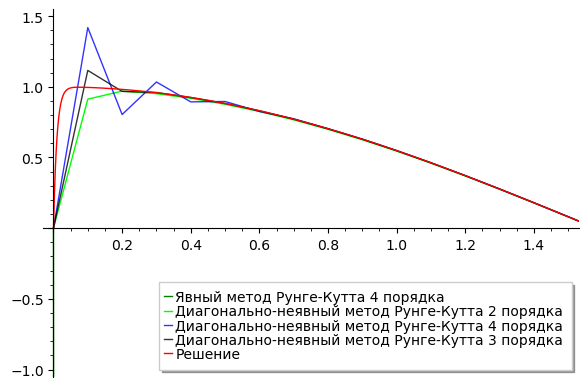

Явный метод Рунге-Кутта 4 порядка                \
   $$x$$   $$y_{ист}$$                             $y_0$  $\epsilon_0$   
0    0.0  1.110223e-16                      0.000000e+00  1.110223e-16   
1    0.1  9.958575e-01                     -2.900791e+02  2.910750e+02   
2    0.2  9.819551e-01                     -8.470196e+04  8.470294e+04   
3    0.3  9.581959e-01                     -2.464856e+07  2.464856e+07   
4    0.4  9.248627e-01                     -7.172730e+09  7.172730e+09   
5    0.5  8.822886e-01                     -2.087264e+12  2.087264e+12   
6    0.6  8.308989e-01                     -6.073939e+14  6.073939e+14   
7    0.7  7.712072e-01                     -1.767516e+17  1.767516e+17   
8    0.8  7.038099e-01                     -5.143473e+19  5.143473e+19   
9    0.9  6.293803e-01                     -1.496751e+22  1.496751e+22   
10   1.0  5.486621e-01                     -4.355544e+24  4.355544e+24   
11   1.1  4.624619e-01                     -1.267463e+27  1.267463e+27   
12   1.2  3.716410e-01                     -3.688318e+29  3.688318e+29   

   Диагонально-неявный метод Рунге-Кутта 2 порядка                \
                                             $y_1$  $\epsilon_1$   
0                                         0.000000  1.110223e-16   
1                                         0.912924  8.293377e-02   
2                                         0.969639  1.231618e-02   
3                                         0.951448  6.747408e-03   
4                                         0.918730  6.132290e-03   
5                                         0.876446  5.842474e-03   
6                                         0.825375  5.524045e-03   
7                                         0.766055  5.152712e-03   
8                                         0.699080  4.730071e-03   
9                                         0.625120  4.260183e-03   
10                                        0.544914  3.747729e-03   
11                                        0.459264  3.197830e-03   
12                                        0.369025  2.615979e-03   

   Диагонально-неявный метод Рунге-Кутта 4 порядка                \
                                             $y_2$  $\epsilon_2$   
0                                         0.000000  1.110223e-16   
1                                         1.419187  4.233295e-01   
2                                         0.803981  1.779738e-01   
3                                         1.034219  7.602293e-02   
4                                         0.893556  3.130689e-02   
5                                         0.896293  1.400430e-02   
6                                         0.825721  5.178320e-03   
7                                         0.774086  2.878296e-03   
8                                         0.703230  5.797080e-04   
9                                         0.630201  8.204954e-04   
10                                        0.548825  1.625077e-04   
11                                        0.462831  3.689539e-04   
12                                        0.371847  2.058315e-04   

   Диагонально-неявный метод Рунге-Кутта 3 порядка                
                                             $y_3$  $\epsilon_3$  
0                                         0.000000  1.110223e-16  
1                                         1.116109  1.202514e-01  
2                                         0.967621  1.433361e-02  
3                                         0.960021  1.825206e-03  
4                                         0.924745  1.178757e-04  
5                                         0.882401  1.123065e-04  
6                                         0.830979  8.047056e-05  
7                                         0.771286  7.916760e-05  
8                                         0.703883  7.330963e-05  
9                                         0.629447  6.717128e-05  
10                                        0.548722  6.030748e-05  

In [15]:
RGM4 = RungeKuttaMethodP(a, Y0, F, RK4step4order)
IRGM2 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, PR2step2order)
IRGM3 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Acb3step4order)
IRGM4 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Acb4step3order)

Table1 = RGM4.Solve(b, H).table(0)
Table2 = IRGM2.Solve(b, H).table(0)
Table3 = IRGM3.Solve(b, H).table(0)
Table4 = IRGM4.Solve(b, H).table(0)

(list_plot(Table1, color = 'green', plotjoined=True, legend_label ='Явный метод Рунге-Кутта 4 порядка') +\
 list_plot(Table2, color = 'lime', plotjoined=True, legend_label ='Диагонально-неявный метод Рунге-Кутта 2 порядка') +\
 list_plot(Table3, color = 'blue', plotjoined=True, alpha =0.8, legend_label ='Диагонально-неявный метод Рунге-Кутта 4 порядка') +\
 list_plot(Table4, color = 'black', plotjoined=True, alpha =0.8, legend_label ='Диагонально-неявный метод Рунге-Кутта 3 порядка') +\
plot(y, (a, b), color = 'red', legend_label ='Решение')).show(ymax = 1.5, ymin = -1, xmax =1.5)

EPS([Table1, Table2, Table3, Table4], y, 
    labels=['Явный метод Рунге-Кутта 4 порядка', 'Диагонально-неявный метод Рунге-Кутта 2 порядка', 
            'Диагонально-неявный метод Рунге-Кутта 4 порядка', 'Диагонально-неявный метод Рунге-Кутта 3 порядка']).head(int(13))

### 3. $\begin{cases} y' = \lambda_1 y + (\lambda_2 - \lambda_1) z \\ z' = \lambda_2 z \end{cases}$

Дана такая система обыкновенных дифференциальных уравнений:

$\begin{cases} y' = \lambda_1 y + (\lambda_2 - \lambda_1) z \\ z' = \lambda_2 z \end{cases}$

$ y(x_0) = y_0 $

$ z(x_0) = z_0 $

Общее решение данной системы уравнений:

$$
\begin{cases} 
y = (y_0 - z_0) e^{\lambda_1 (x - x_0)} + z_0 e^{\lambda_2 (x - x_0)} \\ 
z = z_0 e^{\lambda_2 (x - x_0)}
\end{cases}
$$

Пусть $\lambda_1 = -2, \lambda_2 = -100, y(0) = 2, z(0) = 1$. Тогда система принимает вид:

$\begin{cases} y' = -2 y - 98 z \\ z' = -100 z \end{cases}$

А решением будет:

$$
\begin{cases} 
y = e^{-2 x} + e^{-100 x} \\ 
z = e^{-100 x}
\end{cases}
$$

In [16]:
l1, l2 = -2, -100
H = 0.05
a = 0.0
b = 1.0
Y0 = np.array([2.0,1.0])

def F(x, y, z):
    return np.array([
        l1*y+(l2 - l1)*z,
        l2*z
    ])

def dF(x, y, z):
    return np.array([
        [l1, l2-l1],
        [0.0, l2]
    ])

def y(x):
    return (Y0[0] - Y0[1]) * np.exp(l1 * (x - a)) + Y0[1] * np.exp(l2 * (x - a))

def z(x):
    return Y0[1] * np.exp(l2 * (x - a))

Решение для уравнения $y(x)$

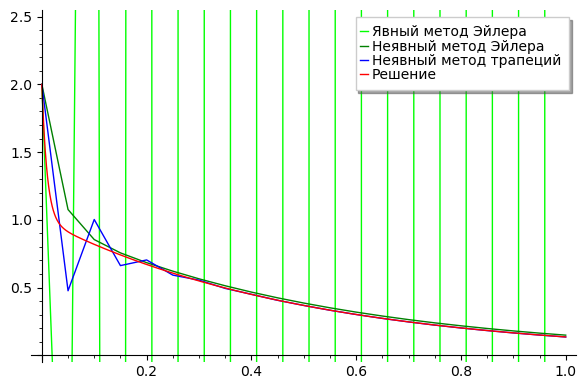

Явный метод Эйлера               Неявный метод Эйлера  \
   $$x$$ $$y_{ист}$$              $y_0$  $\epsilon_0$                $y_1$   
0   0.00    2.000000       2.000000e+00  0.000000e+00             2.000000   
1   0.05    0.911575      -3.100000e+00  4.011575e+00             1.075758   
2   0.10    0.818776       1.681000e+01  1.599122e+01             0.854224   
3   0.15    0.740819      -6.327100e+01  6.401182e+01             0.755944   
4   0.20    0.670320       2.566561e+02  2.559858e+02             0.683785   
5   0.25    0.606531      -1.023410e+03  1.024016e+03             0.621050   
6   0.30    0.548812       4.096531e+03  4.095983e+03             0.564495   
7   0.35    0.496585      -1.638352e+04  1.638402e+04             0.513162   
8   0.40    0.449329       6.553643e+04  6.553598e+04             0.466508   
9   0.45    0.406570      -2.621436e+05  2.621440e+05             0.424098   
10  0.50    0.367879       1.048576e+06  1.048576e+06             0.385543   
11  0.55    0.332871      -4.194304e+06  4.194304e+06             0.350494   
12  0.60    0.301194       1.677722e+07  1.677722e+07             0.318631   

                Неявный метод трапеций               
   $\epsilon_1$                  $y_2$ $\epsilon_2$  
0      0.000000               2.000000     0.000000  
1      0.164182               0.476190     0.435385  
2      0.035448               1.002268     0.183491  
3      0.015126               0.661916     0.078903  
4      0.013465               0.703832     0.033512  
5      0.014519               0.591819     0.014711  
6      0.015684               0.554733     0.005922  
7      0.016576               0.493640     0.002946  
8      0.017179               0.450167     0.000838  
9      0.017528               0.405777     0.000793  
10     0.017664               0.367782     0.000098  
11     0.017623               0.332476     0.000395  
12     0.017437               0.300931     0.000263

In [17]:
EM = RungeKuttaMethodP(a, Y0, F, Euler1step1order)
IEM = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, BackwardEuler1step1order)
TM = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Trap2step2order)

Table1 = EM.Solve(b, H).table(0)
Table2 = IEM.Solve(b, H).table(0)
Table3 = TM.Solve(b, H).table(0)

(list_plot(Table1, color = 'lime', plotjoined=True, legend_label ='Явный метод Эйлера') +\
 list_plot(Table2, color = 'green', plotjoined=True, legend_label ='Неявный метод Эйлера') +\
 list_plot(Table3, color = 'blue', plotjoined=True, legend_label ='Неявный метод трапеций') +\
plot(y, (a, b), color = 'red', legend_label ='Решение')).show(ymax = 2.5, ymin = 0, xmax =1)

EPS([Table1, Table2, Table3], y, labels=['Явный метод Эйлера', 'Неявный метод Эйлера', 'Неявный метод трапеций']).head(int(13))

Решение для уравнения $z(x)$

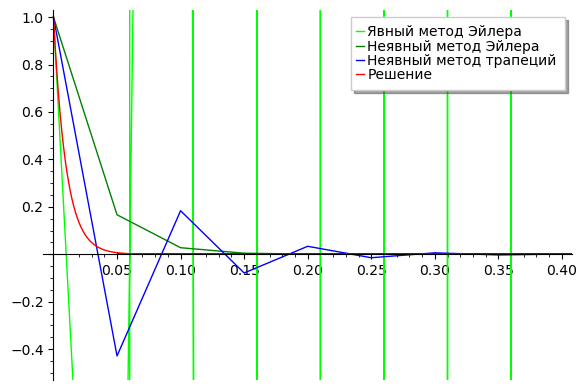

Явный метод Эйлера               Неявный метод Эйлера  \
   $$x$$   $$y_{ист}$$              $y_0$  $\epsilon_0$                $y_1$   
0   0.00  1.000000e+00                1.0  0.000000e+00         1.000000e+00   
1   0.05  6.737947e-03               -4.0  4.006738e+00         1.666667e-01   
2   0.10  4.539993e-05               16.0  1.599995e+01         2.777778e-02   
3   0.15  3.059023e-07              -64.0  6.400000e+01         4.629630e-03   
4   0.20  2.061154e-09              256.0  2.560000e+02         7.716049e-04   
5   0.25  1.388794e-11            -1024.0  1.024000e+03         1.286008e-04   
6   0.30  9.357623e-14             4096.0  4.096000e+03         2.143347e-05   
7   0.35  6.305117e-16           -16384.0  1.638400e+04         3.572245e-06   
8   0.40  4.248354e-18            65536.0  6.553600e+04         5.953742e-07   
9   0.45  2.862519e-20          -262144.0  2.621440e+05         9.922903e-08   
10  0.50  1.928750e-22          1048576.0  1.048576e+06         1.653817e-08   
11  0.55  1.299581e-24         -4194304.0  4.194304e+06         2.756362e-09   
12  0.60  8.756511e-27         16777216.0  1.677722e+07         4.593937e-10   

                 Неявный метод трапеций               
    $\epsilon_1$                  $y_2$ $\epsilon_2$  
0   0.000000e+00               1.000000     0.000000  
1   1.599287e-01              -0.428571     0.435309  
2   2.773238e-02               0.183673     0.183628  
3   4.629324e-03              -0.078717     0.078718  
4   7.716029e-04               0.033736     0.033736  
5   1.286008e-04              -0.014458     0.014458  
6   2.143347e-05               0.006196     0.006196  
7   3.572245e-06              -0.002656     0.002656  
8   5.953742e-07               0.001138     0.001138  
9   9.922903e-08              -0.000488     0.000488  
10  1.653817e-08               0.000209     0.000209  
11  2.756362e-09              -0.000090     0.000090  
12  4.593937e-10               0.000038     0.000038

In [18]:
Table1 = EM.Solve(b, H).table(1)
Table2 = IEM.Solve(b, H).table(1)
Table3 = TM.Solve(b, H).table(1)

(list_plot(Table1, color = 'lime', plotjoined=True, legend_label ='Явный метод Эйлера') +\
 list_plot(Table2, color = 'green', plotjoined=True, legend_label ='Неявный метод Эйлера') +\
 list_plot(Table3, color = 'blue', plotjoined=True, legend_label ='Неявный метод трапеций') +\
plot(z, (a, b), color = 'red', legend_label ='Решение')).show(ymax = 1, ymin = -0.5, xmax =0.4)

EPS([Table1, Table2, Table3], z, labels=['Явный метод Эйлера', 'Неявный метод Эйлера', 'Неявный метод трапеций']).head(int(13))

Решение для уравнения $y(x)$

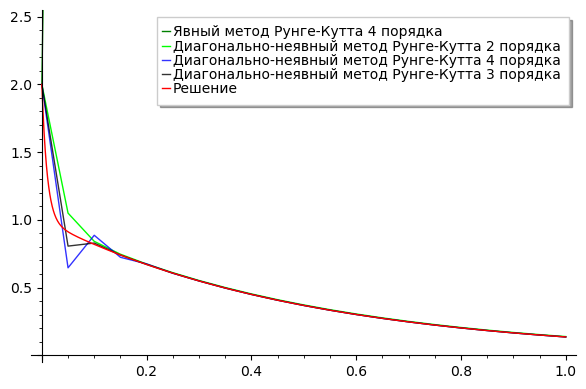

Явный метод Рунге-Кутта 4 порядка                \
   $$x$$ $$y_{ист}$$                             $y_0$  $\epsilon_0$   
0   0.00    2.000000                      2.000000e+00  0.000000e+00   
1   0.05    0.911575                      1.461317e+01  1.370160e+01   
2   0.10    0.818776                      1.887371e+02  1.879184e+02   
3   0.15    0.740819                      2.576789e+03  2.576048e+03   
4   0.20    0.670320                      3.531400e+04  3.531333e+04   
5   0.25    0.606531                      4.840875e+05  4.840868e+05   
6   0.30    0.548812                      6.636024e+06  6.636024e+06   
7   0.35    0.496585                      9.096883e+07  9.096883e+07   
8   0.40    0.449329                      1.247031e+09  1.247031e+09   
9   0.45    0.406570                      1.709472e+10  1.709472e+10   
10  0.50    0.367879                      2.343401e+11  2.343401e+11   
11  0.55    0.332871                      3.212412e+12  3.212412e+12   
12  0.60    0.301194                      4.403681e+13  4.403681e+13   

   Диагонально-неявный метод Рунге-Кутта 2 порядка               \
                                             $y_1$ $\epsilon_1$   
0                                         2.000000     0.000000   
1                                         1.049529     0.137953   
2                                         0.841093     0.022316   
3                                         0.746093     0.005274   
4                                         0.673528     0.003208   
5                                         0.609739     0.003208   
6                                         0.552239     0.003428   
7                                         0.500197     0.003612   
8                                         0.453065     0.003736   
9                                         0.410375     0.003805   
10                                        0.371707     0.003827   
11                                        0.336683     0.003811   
12                                        0.304958     0.003764   

   Диагонально-неявный метод Рунге-Кутта 4 порядка               \
                                             $y_2$ $\epsilon_2$   
0                                         2.000000     0.000000   
1                                         0.645709     0.265866   
2                                         0.885876     0.067099   
3                                         0.723416     0.017403   
4                                         0.674825     0.004505   
5                                         0.605358     0.001172   
6                                         0.549110     0.000299   
7                                         0.496502     0.000083   
8                                         0.449345     0.000016   
9                                         0.406560     0.000010   
10                                        0.367876     0.000003   
11                                        0.332866     0.000005   
12                                        0.301190     0.000005   

   Диагонально-неявный метод Рунге-Кутта 3 порядка               
                                             $y_3$ $\epsilon_3$  
0                                         2.000000     0.000000  
1                                         0.805988     0.105587  
2                                         0.828498     0.009722  
3                                         0.739848     0.000971  
4                                         0.670410     0.000090  
5                                         0.606515     0.000016  
6                                         0.548806     0.000006  
7                                         0.496578     0.000007  
8                                         0.449322     0.000007  
9                                         0.406562     0.000007  
10                                        0.367872     0.000007  
11                                        0.332864     0.000007  
12  

In [19]:
RGM4 = RungeKuttaMethodP(a, Y0, F, RK4step4order)
IRGM2 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, PR2step2order)
IRGM3 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Acb3step4order)
IRGM4 = DiagonallyImplicitRungeKuttaMethodP(a, Y0, F, dF, Acb4step3order)

Table1 = RGM4.Solve(b, H).table(0)
Table2 = IRGM2.Solve(b, H).table(0)
Table3 = IRGM3.Solve(b, H).table(0)
Table4 = IRGM4.Solve(b, H).table(0)

(list_plot(Table1, color = 'green', plotjoined=True, legend_label ='Явный метод Рунге-Кутта 4 порядка') +\
 list_plot(Table2, color = 'lime', plotjoined=True, legend_label ='Диагонально-неявный метод Рунге-Кутта 2 порядка') +\
 list_plot(Table3, color = 'blue', plotjoined=True, alpha =0.8, legend_label ='Диагонально-неявный метод Рунге-Кутта 4 порядка') +\
 list_plot(Table4, color = 'black', plotjoined=True, alpha =0.8, legend_label ='Диагонально-неявный метод Рунге-Кутта 3 порядка') +\
plot(y, (a, b), color = 'red', legend_label ='Решение')).show(ymax = 2.5, ymin = 0, xmax =1)

EPS([Table1, Table2, Table3, Table4], y, 
    labels=['Явный метод Рунге-Кутта 4 порядка', 'Диагонально-неявный метод Рунге-Кутта 2 порядка', 
            'Диагонально-неявный метод Рунге-Кутта 4 порядка', 'Диагонально-неявный метод Рунге-Кутта 3 порядка']).head(int(13))

Решение для уравнения $z(x)$

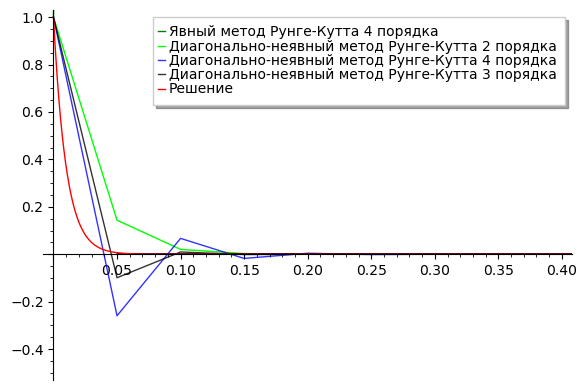

Явный метод Рунге-Кутта 4 порядка                \
   $$x$$   $$y_{ист}$$                             $y_0$  $\epsilon_0$   
0   0.00  1.000000e+00                      1.000000e+00  0.000000e+00   
1   0.05  6.737947e-03                      1.370833e+01  1.370160e+01   
2   0.10  4.539993e-05                      1.879184e+02  1.879184e+02   
3   0.15  3.059023e-07                      2.576048e+03  2.576048e+03   
4   0.20  2.061154e-09                      3.531333e+04  3.531333e+04   
5   0.25  1.388794e-11                      4.840868e+05  4.840868e+05   
6   0.30  9.357623e-14                      6.636024e+06  6.636024e+06   
7   0.35  6.305117e-16                      9.096883e+07  9.096883e+07   
8   0.40  4.248354e-18                      1.247031e+09  1.247031e+09   
9   0.45  2.862519e-20                      1.709472e+10  1.709472e+10   
10  0.50  1.928750e-22                      2.343401e+11  2.343401e+11   
11  0.55  1.299581e-24                      3.212412e+12  3.212412e+12   
12  0.60  8.756511e-27                      4.403681e+13  4.403681e+13   

   Диагонально-неявный метод Рунге-Кутта 2 порядка                \
                                             $y_1$  $\epsilon_1$   
0                                     1.000000e+00  0.000000e+00   
1                                     1.437544e-01  1.370164e-01   
2                                     2.066532e-02  2.061992e-02   
3                                     2.970730e-03  2.970424e-03   
4                                     4.270553e-04  4.270533e-04   
5                                     6.139107e-05  6.139105e-05   
6                                     8.825234e-06  8.825234e-06   
7                                     1.268666e-06  1.268666e-06   
8                                     1.823763e-07  1.823763e-07   
9                                     2.621738e-08  2.621738e-08   
10                                    3.768863e-09  3.768863e-09   
11                                    5.417905e-10  5.417905e-10   
12                                    7.788476e-11  7.788476e-11   

   Диагонально-неявный метод Рунге-Кутта 4 порядка                \
                                             $y_2$  $\epsilon_2$   
0                                     1.000000e+00  0.000000e+00   
1                                    -2.591272e-01  2.658652e-01   
2                                     6.714692e-02  6.710152e-02   
3                                    -1.739960e-02  1.739990e-02   
4                                     4.508709e-03  4.508707e-03   
5                                    -1.168329e-03  1.168329e-03   
6                                     3.027459e-04  3.027459e-04   
7                                    -7.844971e-05  7.844971e-05   
8                                     2.032846e-05  2.032846e-05   
9                                    -5.267657e-06  5.267657e-06   
10                                    1.364993e-06  1.364993e-06   
11                                   -3.537069e-07  3.537069e-07   
12                                    9.165510e-08  9.165510e-08   

   Диагонально-неявный метод Рунге-Кутта 3 порядка                
                                             $y_3$  $\epsilon_3$  
0                                     1.000000e+00  0.000000e+00  
1                                    -9.884770e-02  1.055856e-01  
2                                     9.770868e-03  9.725468e-03  
3                                    -9.658279e-04  9.661338e-04  
4                                     9.546987e-05  9.546781e-05  
5                                    -9.436977e-06  9.436991e-06  
6                                     9.328235e-07  9.328234e-07  
7                                    -9.220746e-08  9.220746e-08  
8                                     9.114495e-09  9.114495e-09  
9                                    -9.009469e-10  9.009469e-10  
10                                    8.905653e-11  8.905653e-11  

In [20]:
Table1 = RGM4.Solve(b, H).table(1)
Table2 = IRGM2.Solve(b, H).table(1)
Table3 = IRGM3.Solve(b, H).table(1)
Table4 = IRGM4.Solve(b, H).table(1)

(list_plot(Table1, color = 'green', plotjoined=True, legend_label ='Явный метод Рунге-Кутта 4 порядка') +\
 list_plot(Table2, color = 'lime', plotjoined=True, legend_label ='Диагонально-неявный метод Рунге-Кутта 2 порядка') +\
 list_plot(Table3, color = 'blue', plotjoined=True, alpha =0.8, legend_label ='Диагонально-неявный метод Рунге-Кутта 4 порядка') +\
 list_plot(Table4, color = 'black', plotjoined=True, alpha =0.8, legend_label ='Диагонально-неявный метод Рунге-Кутта 3 порядка') +\
plot(z, (a, b), color = 'red', legend_label ='Решение')).show(ymax = 1, ymin = -0.5, xmax =0.4)

EPS([Table1, Table2, Table3, Table4], z, 
    labels=['Явный метод Рунге-Кутта 4 порядка', 'Диагонально-неявный метод Рунге-Кутта 2 порядка', 
            'Диагонально-неявный метод Рунге-Кутта 4 порядка', 'Диагонально-неявный метод Рунге-Кутта 3 порядка']).head(int(13))

## 5. Выводы

В ходе данной курсовой работы я познакомился с неявными методами Рунге-Кутта решения обыкновенных дифференциальных уравнений. Данная тема меня очень заинтересовала отсутствием универсальных методов, способных справится с задачами (которые имеют реальное происхождение), которым дали отдельное название - жесткие системы ОДУ.

В ходе работы были реализованы универсальные явный и диагонально-неявный методы Рунге-Кутта в виде отдельных классов, предоставляющих возможность задавать матрицы Бутчера для подбора наилучшего метода решения определенной задачи.

Также была разобрана сложная тема A- и L-устойчивости, приведены подробные примеры для методов Эйлера; разобрана тема функции устойчивости (без вывода общей формулы) на частных примерах; приведена визуализация областей устойчивости для различных методов.

Реализованные методы с различными матрицами Бутчера были протестированы на трёх примерах. Диагонально-неявные методы отлично справляются с решением данных задач и демонстрируют преимущество над явными.